In [1]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

### Problme 1

#### Qeustion 1

<font size = 3 color = black face = "Times New Roman">First, we define the matrix A

In [2]:
matrix_A =np.array([[-2,2,-3],
                   [2,1,-6],
                   [-1,-2,0]])

In [3]:
Es,Ev = eig(matrix_A)
print('Eigenvalues are ',Es)
print('Eigenvectors are \n',Ev)

Eigenvalues are  [-3.  5. -3.]
Eigenvectors are 
 [[-0.95257934  0.40824829 -0.02296692]
 [ 0.27216553  0.81649658  0.83534731]
 [-0.13608276 -0.40824829  0.54924256]]


<font size = 3 color = black face = "Times New Roman">Here, we verify that we obtain the eigenvalues $\lambda_1 = 5$, $\lambda_2 = \lambda_3 = −3$.

#### Question 2


In [4]:
# Define the eigenvector of the eigenvalue 5.
x1 = np.array([[-1 / np.sqrt(6)],[-2 / np.sqrt(6)],[1 / np.sqrt(6)]])
print(x1)

[[-0.40824829]
 [-0.81649658]
 [ 0.40824829]]


In [5]:
print(np.dot(matrix_A,x1) == 5 * x1)

[[ True]
 [ True]
 [ True]]


<font size = 3 color = black face = "Times New Roman">Obviously, the eigenvector for $λ_1 = 5$ is proportional to
$$
x_1 = \frac{1}{\sqrt{6}}\begin{pmatrix}
−1 \\ −2 \\+1\end{pmatrix}
$$

#### Question 3


<font size = 3 color = black face = "Times New Roman">The eigenvectors are
$$
x_1 = \frac{1}{\sqrt{6}}\begin{pmatrix}
−1 \\ −2 \\+1\end{pmatrix},\quad
x_2 = \frac{1}{\sqrt{5}}\begin{pmatrix}
−2\\ +1\\0\end{pmatrix},\quad
x_3 = \frac{1}{\sqrt{10}}\begin{pmatrix}
3\\ 0\\1\end{pmatrix}
$$
<font size = 3 color = black face = "Times New Roman">Suppose here is a matrix B, where
$$
B = \begin{pmatrix}
x_2 & x_1 & x_3\end{pmatrix}
$$
T<font size = 3 color = black face = "Times New Roman">hen the eigenvector matrix ($Ev$) that we got before can be describled as $Ev = BC$ The values of the vectors in the C matrix are the coefficients of the linear combinations.


<font size = 3 color = black face = "Times New Roman">Hence $C = B^{-1}Ev$

In [6]:
# Define matrix B
matrix_B = np.array([[-2 / np.sqrt(5),-1 / np.sqrt(6),3 / np.sqrt(10)],
                     [1 / np.sqrt(5),-2 / np.sqrt(6),0],
                     [0,1 / np.sqrt(6),1 / np.sqrt(10)]])

In [7]:
C = np.dot(np.linalg.inv(matrix_B),Ev)
print(C)

[[ 6.08580619e-01 -4.36232184e-16  1.86789337e+00]
 [-4.01880650e-17 -1.00000000e+00  4.43399771e-18]
 [-4.30331483e-01 -2.27092718e-16  1.73685749e+00]]


<font size = 3 color = black face = "Times New Roman">Suppose the two eigenvectors we get for eigenvalue $\lambda_2 = \lambda_3 = −3$ is $a$ and $b$.

<font size = 3 color = black face = "Times New Roman">Then 
$$
a = 0.608580619x_2 - 0.430331483x_3\\
b = 1.86789337x_2 + 1.73685749x_3
$$

### Problem 5

In [8]:
# Define data points.
T = np.array([50,100,150,200,400,600,800,1000])
k = np.array([28,9.1,4.0,2.7,1.1,0.6,0.4,0.3])

In [9]:
# Define the linear fitting function
def linear_fitting(A,B):
    n = len(A)
    A_average = np.mean(A)
    B_average = np.mean(B)
    a_1 = sum((A[i] - A_average) * B[i] for i in range(n)) / sum((A[i] - A_average) * A[i] for i in range(n))
    a_0 = B_average - a_1 * A_average
    def f(x):
        return a_0 + a_1 * x
    # The sum of the squares of the residuals
    res = sum((B[i] - f(A[i])) ** 2 for i in range(n))
    # The standard deviation
    s = np.sqrt(res / (n - 2))
    return a_0, a_1, res, s

#### Power function method


<font size = 3 color = black face = "Times New Roman">In this method $k = f(T) = aT^b$ thus $lnk = ln a + blnT.$

In [10]:
lnT = np.log(T)
lnk = np.log(k)

In [11]:
a,b,res,s = linear_fitting(lnT,lnk)
print(np.exp(a),b)

8441.641522899785 -1.4940377457085166


In [12]:
fitting_value_P = np.exp(a) * T ** b
print(fitting_value_P)

[24.44002188  8.67663672  4.73439432  3.08035832  1.09358127  0.59671104
  0.38824054  0.27817216]


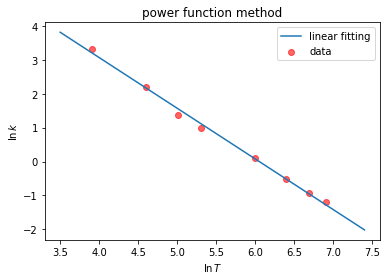

In [13]:
x = np.arange(3.5,7.5,0.1)
y = a + b * x
plt.title('power function method')
plt.xlabel(r'$\ln\,T$')
plt.ylabel(r'$\ln\,k$')
plt.plot(x, y) 
plt.scatter(lnT, lnk, alpha=0.6, color='red')
plt.legend(['linear fitting','data'] )
plt.show()

<font size = 3 color = black face = "Times New Roman">Hence $k = 8441.6T^{-1.5} $ 

#### Exponential function method

<font size = 3 color = black face = "Times New Roman">In this method $k = f(T) = ae^{bT}$ thus $lnk = ln a + bT.$

In [14]:
lnk = np.log(k)

In [15]:
a,b,res,s = linear_fitting(T,lnk)
print(np.exp(a),b)

10.89029722611228 -0.0041571914432840555


In [16]:
fitting_value_E = np.exp(a) * np.exp(T * b)
print(fitting_value_E)

[8.84641824 7.1861322  5.83744682 4.74188123 2.06472212 0.89902662
 0.39145648 0.17044899]


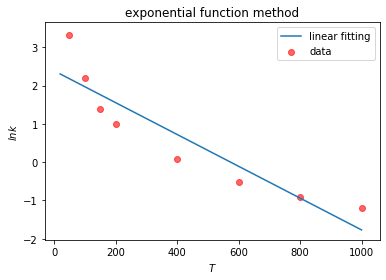

In [17]:
x = np.arange(20,1000,0.1)
y = a + b * x
plt.title('exponential function method')
plt.xlabel('$T$')
plt.ylabel('$lnk$')
plt.plot(x, y) 
plt.scatter(T, lnk, alpha=0.6, color='red')
plt.legend(['linear fitting','data'] )
plt.show()

<font size = 3 color = black face = "Times New Roman">Hence $k = 10.890e^{-0.04T}$

#### Saturation function method

<font size = 3 color = black face = "Times New Roman">In this method $k = f(T) = \frac{T}{aT+b}$ thus $\frac{1}{k} = a + b\frac{1}{T} .$

In [18]:
one_T = 1. / T
one_k = 1. / k

In [19]:
a,b,res,s = linear_fitting(one_T,one_k)
print(a,b)

1.9352560475373126 -131.1677512353447


In [20]:
fitting_value_S = T / (a * T + b)
print(fitting_value_S)

[-1.4532793   1.60364725  0.94268088  0.78160582  0.62214719  0.58253226
  0.56455827  0.5542966 ]


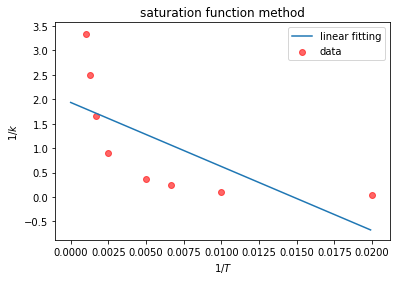

In [21]:
x = np.arange(0,0.02,0.0001)
y = a + b * x
plt.title('saturation function method')
plt.xlabel('$1/T$')
plt.ylabel('$1/k$')
plt.plot(x, y) 
plt.scatter(one_T, one_k, alpha=0.6, color='red')
plt.legend(['linear fitting','data'] )
plt.show()

<font size = 3 color = black face = "Times New Roman">Hence $k = \frac{T}{1.9 T -131.2 }$

#### Conclusion

In [22]:
print('T\t\tk\t\tpower\t\texponential\t\tsaturation')
print(100 * '-')
for i in range(len(T)):
    print(f'{T[i]:<.0f}\t\t{k[i]}\t\t{fitting_value_P[i]:<5f}\t{fitting_value_E[i]:<5f}\t\t{fitting_value_S[i]:<5f}')

T		k		power		exponential		saturation
----------------------------------------------------------------------------------------------------
50		28.0		24.440022	8.846418		-1.453279
100		9.1		8.676637	7.186132		1.603647
150		4.0		4.734394	5.837447		0.942681
200		2.7		3.080358	4.741881		0.781606
400		1.1		1.093581	2.064722		0.622147
600		0.6		0.596711	0.899027		0.582532
800		0.4		0.388241	0.391456		0.564558
1000		0.3		0.278172	0.170449		0.554297


<font size = 3 color = black face = "Times New Roman">From the plot and figures, we are easy to know that power function can best fit the data. Thus $k = 8441.6T^{-1.5}$